<a href="https://colab.research.google.com/github/Swagat-modder/Zeotap/blob/main/Swagat_Garadia_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing necessary libraries for statistical analysis and visualization of the data

In [2]:
df1=pd.read_csv("/content/Customers.csv")
df2=pd.read_csv("/content/Products.csv")
df3=pd.read_csv("/content/Transactions.csv")
#reading the contents of the datasets
df1.head()#top 5 rows of all columns in this dataset

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
df2.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [4]:
df3.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
df1.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [6]:
df2.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [7]:
df3.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


None of these datasets have null values so we will jump into extracting insights through exploratory data analysis.

In [10]:
#first converting date columns to date time format
df1['SignupDate'] = pd.to_datetime(df1['SignupDate'])
df3['TransactionDate'] = pd.to_datetime(df3['TransactionDate'])

In [12]:
df3.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68


In [43]:
customers_summary = df1['Region'].value_counts()
customers_summary

,count
Region,
South America,59
Europe,50
North America,46
Asia,45


<ipython-input-53-f2a5ce14e49f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='Region', order=df1['Region'].value_counts().index, palette='viridis')


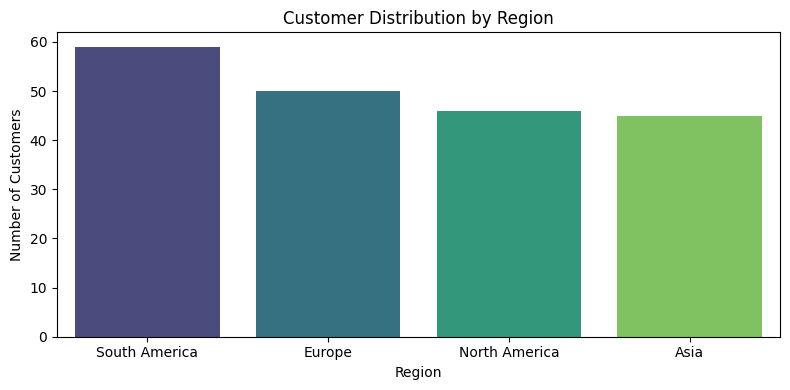

In [53]:
# Visualizing Customer regions
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x='Region', order=df1['Region'].value_counts().index, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [45]:
products_summary = df2['Category'].value_counts()
products_summary

,count
Category,
Books,26
Electronics,26
Clothing,25
Home Decor,23


<ipython-input-54-bb5a9a80b350>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, y='Category', order=df2['Category'].value_counts().index, palette='viridis')


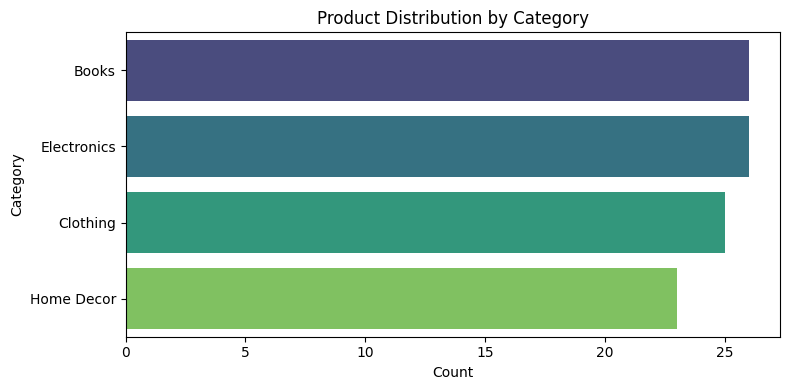

In [54]:
# Visualizing Product categories
plt.figure(figsize=(8, 4))
sns.countplot(data=df2, y='Category', order=df2['Category'].value_counts().index, palette='viridis')
plt.title('Product Distribution by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [47]:
transaction_summary = df3.describe()
transaction_summary

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


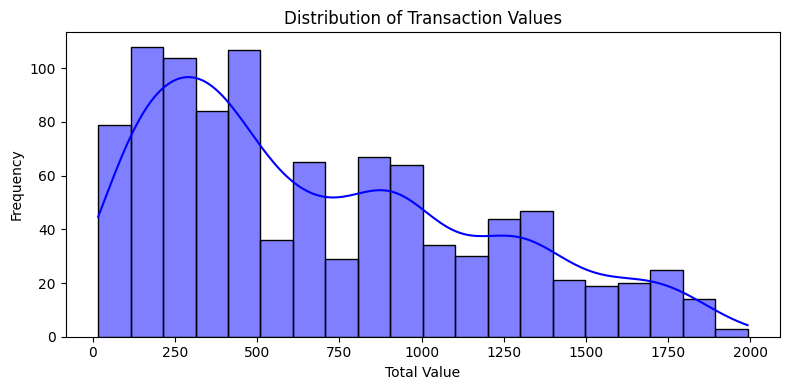

In [67]:
# Visualizing Total transaction value distribution
plt.figure(figsize=(8, 4))
sns.histplot(df3['TotalValue'], bins=20, kde=True, color='blue')
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [25]:
#merging datasets for deeper insights and analysis
transactions_full = df3.merge(df1, on='CustomerID').merge(df2, on='ProductID')

In [41]:
# Analyzing purchases by region
region_sales = transactions_full.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales

,TotalValue
Region,
South America,219352.56
Europe,166254.63
North America,152313.40
Asia,152074.97


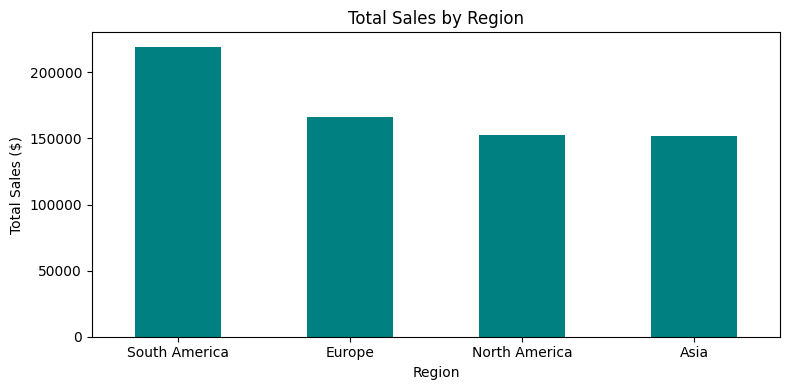

In [37]:
# Visualizaing Region-wise sales
plt.figure(figsize=(8, 4))
region_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales ($)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [42]:
# Analyzing top-performing product categories
category_sales = transactions_full.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales

,TotalValue
Category,
Books,192147.47
Electronics,180783.50
Clothing,166170.66
Home Decor,150893.93


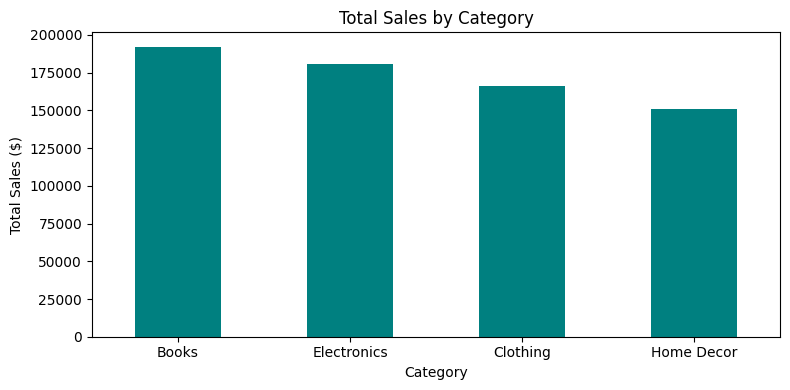

In [40]:
# Visualizing Category-wise sales
plt.figure(figsize=(8, 4))
category_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales ($)')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [51]:
# Analyzing customer behavior i.e Average spending per region
region_avg_spend = transactions_full.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
region_avg_spend

,TotalValue
Region,
South America,721.554474
Europe,710.489872
Asia,697.591606
North America,624.235246


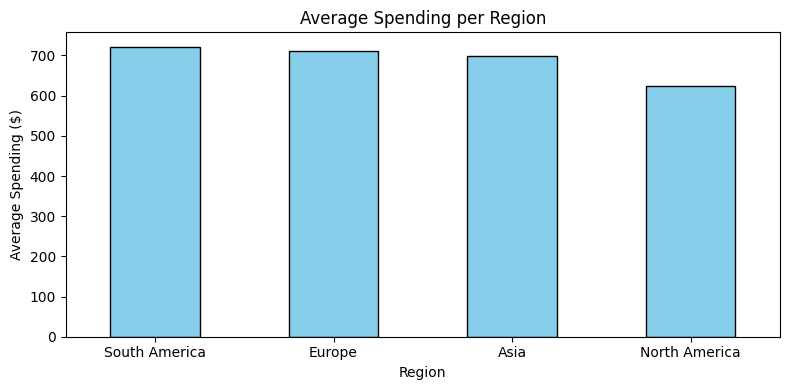

In [71]:
plt.figure(figsize=(8, 4))
region_avg_spend.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Spending per Region')
plt.xlabel('Region')
plt.ylabel('Average Spending ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [52]:
# Analyzing top-selling products by quantity sold
top_products = transactions_full.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
top_products

,Quantity
ProductName,
ActiveWear Smartwatch,100
SoundWave Headphones,97
HomeSense Desk Lamp,81
ActiveWear Rug,79
SoundWave Cookbook,78


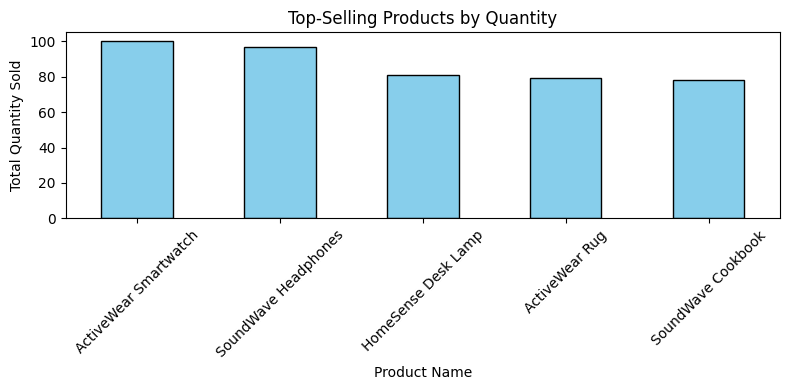

In [74]:
plt.figure(figsize=(8, 4))
top_products.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top-Selling Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()